In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

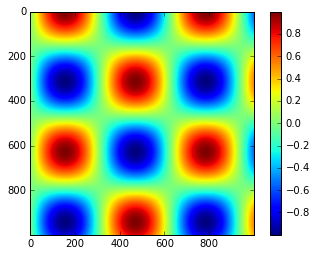

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

# 4.9.1 配置颜色条

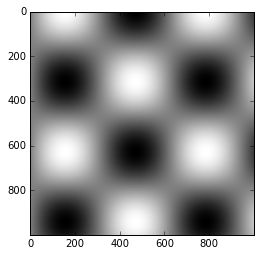

In [4]:
plt.imshow(I, cmap='gray')

## 1. 选择配色方案

只需要重点关注三种不同的配色方案

- 顺序配色方案
  由一组连续的颜色构成的配色方案（例如binary或viridis）
- 互逆配色方案
  通常由两种互补的颜色构成，表示正反两种含义（例如RdBu或PuOr）
- 定性配色方案
  随机顺序的一组颜色（例如rainbow或jet）

In [5]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray', colors, cmap.N)

def view_colormap(cmap):
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

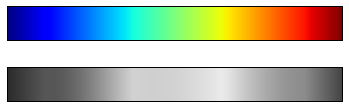

In [6]:
view_colormap('jet')

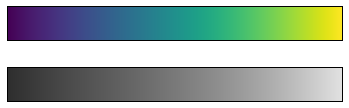

In [7]:
view_colormap('viridis')

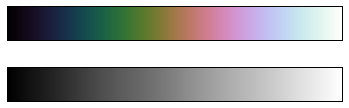

In [8]:
view_colormap('cubehelix')

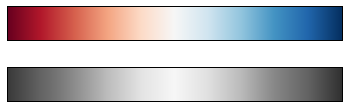

In [9]:
view_colormap('RdBu')

## 2. 颜色条刻度的限制与扩展功能的设置

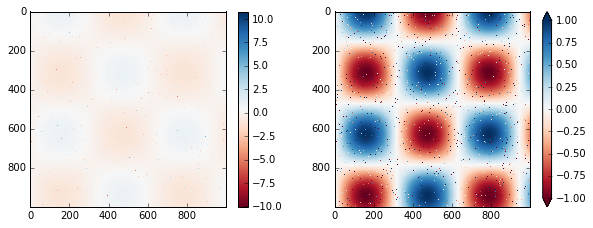

In [10]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

## 3. 离散型颜色条

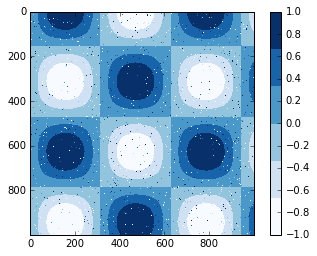

In [11]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

# 4.9.2 案例：手写数字

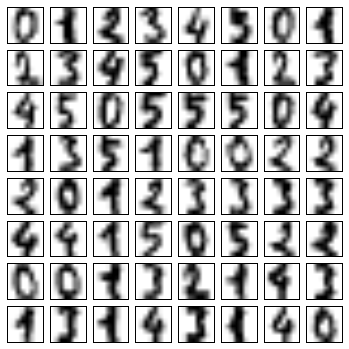

In [12]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [13]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

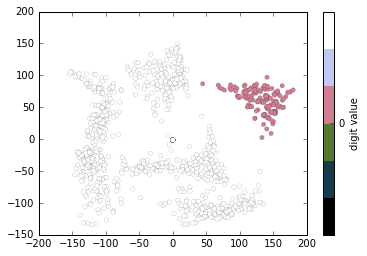

In [14]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 0.5)